In [2]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import findfont, FontProperties

In [3]:
matplotlib.rcParams['font.family'] = "serif"
matplotlib.rcParams['font.sans-serif'] = "Times New Roman"
matplotlib.rcParams['font.size'] = 12

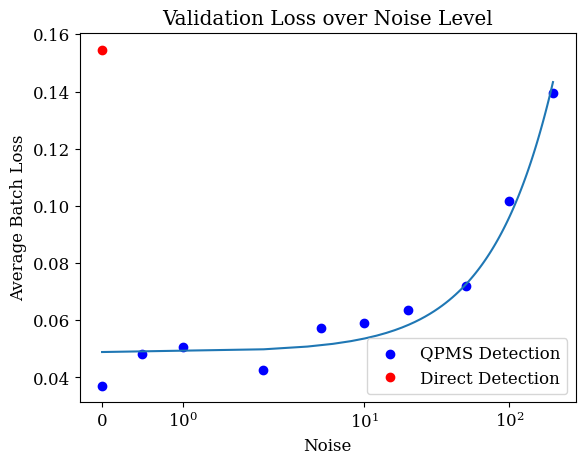

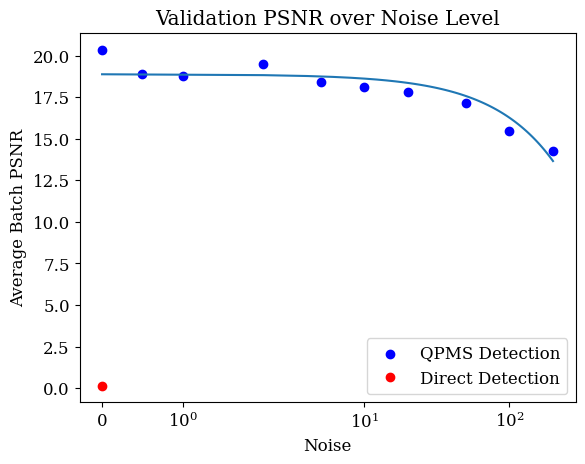

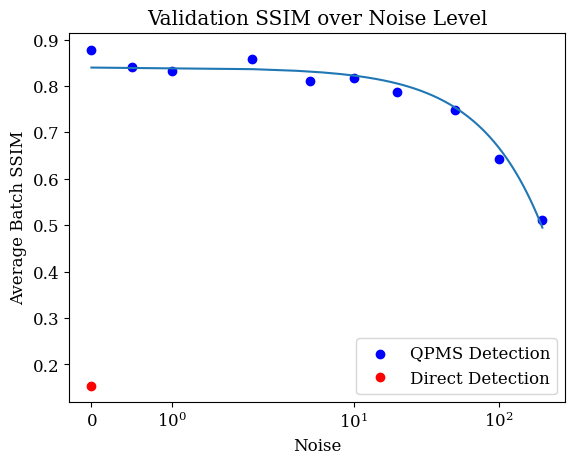

In [4]:
results = pd.read_csv("../data/features/ASE_noise/300_reconstruction_results.csv")
direct = results[results["detection_type"] == "Direct Detection"]
qpms = results[results["detection_type"] == "QPMS"]

x_fitted = np.linspace(np.min(results["noise"]), np.max(results["noise"]), 100)

plt.scatter(qpms["noise"], qpms["val_loss"], color='b', label="QPMS Detection")
plt.plot(0, direct["val_loss"], 'ro', label="Direct Detection")
[a,b] = np.polyfit(qpms["noise"], qpms["val_loss"], 1)
y_fitted = a*x_fitted + b
plt.plot(x_fitted, y_fitted)
plt.xscale("symlog")
plt.title("Validation Loss over Noise Level")
plt.ylabel("Average Batch Loss")
plt.xlabel("Noise")
plt.legend()
plt.show()

plt.scatter(qpms["noise"], qpms["val_psnr"], color='b', label="QPMS Detection")
plt.plot(0, direct["val_loss"], 'ro', label="Direct Detection")
[a,b] = np.polyfit(qpms["noise"], qpms["val_psnr"], 1)
y_fitted = a*x_fitted + b
plt.plot(x_fitted, y_fitted)
plt.xscale("symlog")
plt.title("Validation PSNR over Noise Level")
plt.ylabel("Average Batch PSNR")
plt.xlabel("Noise")
plt.legend()
plt.show()

plt.scatter(qpms["noise"], qpms["val_ssim"], color='b', label="QPMS Detection")
plt.plot(0, direct["val_loss"], 'ro', label="Direct Detection")
[a,b] = np.polyfit(qpms["noise"], qpms["val_ssim"], 1)
y_fitted = a*x_fitted + b
plt.plot(x_fitted, y_fitted)
plt.xscale("symlog")
plt.title("Validation SSIM over Noise Level")
plt.ylabel("Average Batch SSIM")
plt.xlabel("Noise")
plt.legend()
plt.show()

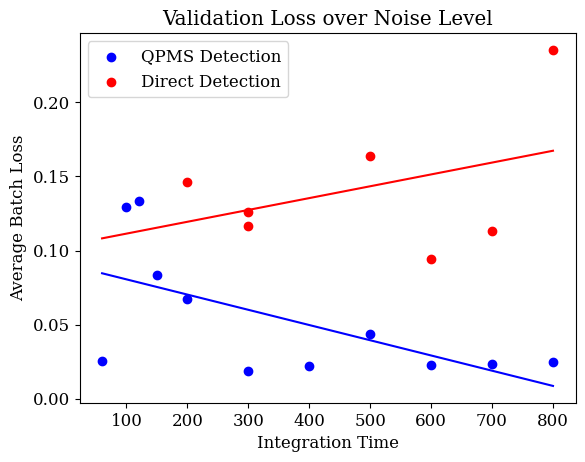

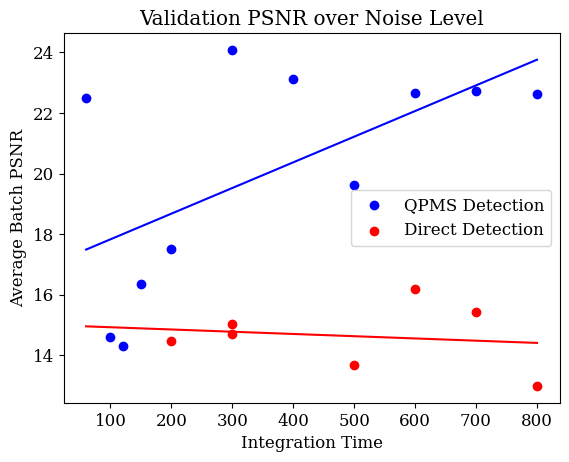

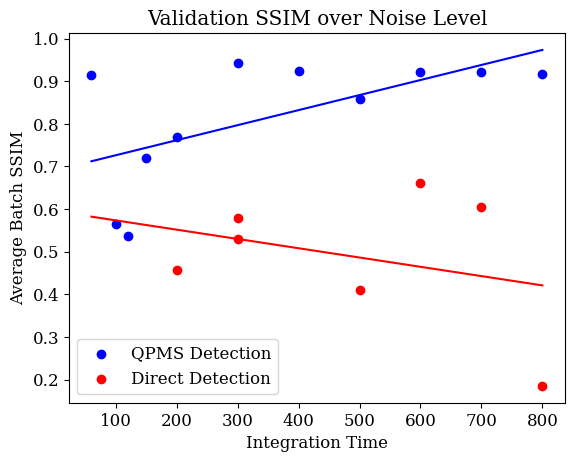

In [8]:
results = pd.read_csv("../data/features/integration_time/300_reconstruction_results.csv")
direct = results[results["detection_type"] == "Direct Detection"]
qpms = results[results["detection_type"] == "QPMS"]

x_fitted = np.linspace(np.min(results["dmd_time"]), np.max(results["dmd_time"]), 100)

plt.scatter(qpms["dmd_time"], qpms["val_loss"], color='b', label="QPMS Detection")
plt.scatter(direct["dmd_time"], direct["val_loss"], color='r', label="Direct Detection")
[a,b] = np.polyfit(qpms["dmd_time"], qpms["val_loss"], 1)
y_fitted = a*x_fitted + b
plt.plot(x_fitted, y_fitted, "b")
[a,b] = np.polyfit(direct["dmd_time"], direct["val_loss"], 1)
y_fitted = a*x_fitted + b
plt.plot(x_fitted, y_fitted, "r")
plt.title("Validation Loss over Noise Level")
plt.ylabel("Average Batch Loss")
plt.xlabel("Integration Time")
plt.legend()
plt.show()

plt.scatter(qpms["dmd_time"], qpms["val_psnr"], color='b', label="QPMS Detection")
plt.scatter(direct["dmd_time"], direct["val_psnr"], color='r', label="Direct Detection")
[a,b] = np.polyfit(qpms["dmd_time"], qpms["val_psnr"], 1)
y_fitted = a*x_fitted + b
plt.plot(x_fitted, y_fitted, "b")
[a,b] = np.polyfit(direct["dmd_time"], direct["val_psnr"], 1)
y_fitted = a*x_fitted + b
plt.plot(x_fitted, y_fitted, "r")
plt.title("Validation PSNR over Noise Level")
plt.ylabel("Average Batch PSNR")
plt.xlabel("Integration Time")
plt.legend()
plt.show()

plt.scatter(qpms["dmd_time"], qpms["val_ssim"], color='b', label="QPMS Detection")
plt.scatter(direct["dmd_time"], direct["val_ssim"], color='r', label="Direct Detection")
[a,b] = np.polyfit(qpms["dmd_time"], qpms["val_ssim"], 1)
y_fitted = a*x_fitted + b
plt.plot(x_fitted, y_fitted, "b")
[a,b] = np.polyfit(direct["dmd_time"], direct["val_ssim"], 1)
y_fitted = a*x_fitted + b
plt.plot(x_fitted, y_fitted, "r")
plt.title("Validation SSIM over Noise Level")
plt.ylabel("Average Batch SSIM")
plt.xlabel("Integration Time")
plt.legend()
plt.show()